In [1]:
from platform import python_version
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

# set seaborn theme
sns.set_theme()

# print versions
print("Numpy Version: " + np.__version__)
print("Pandas Version: " + pd.__version__)
print("Seaborn Version: " + sns.__version__)
print("Matplotlib Version: " + plt.matplotlib.__version__)
print("Python Version: " + python_version())

# adjust pandas display options to max
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
# adjust pandas display options to ensure full display of content
pd.set_option('display.max_colwidth', None)

Numpy Version: 1.26.4
Pandas Version: 2.2.3
Seaborn Version: 0.13.2
Matplotlib Version: 3.9.2
Python Version: 3.9.20


In [2]:
# data file
df = pd.read_pickle("../Data/Version1_MLPer100Days.pkl")

In [3]:
# extract number of days only from description feature
df['Info'] = df['Description'].str.extract(r'((\d+) days)')[0]

In [4]:
df.head()

,Algorithm,Model,Description,DataType,Accuracy,RecallSensitivity,F1Score,AveragePrecision,Precision,Specificity,ROC_AUC_Score,Info
0,RandomForestClassifier,rfc_GS_fit,RandomForestClassifier - Grid Search 100 days- Features where p_value <= 0.05,Training,0.689422,0.681447,0.788614,0.908500,0.935777,0.734668,0.708058,100 days
1,RandomForestClassifier,rfc_GS_fit,RandomForestClassifier - Grid Search 100 days- Features where p_value <= 0.05,Testing,0.640660,0.650927,0.754862,0.881423,0.898295,0.582500,0.616713,100 days
2,RandomForestClassifier,rfc_GS_fit,RandomForestClassifier - Grid Search 200 days- Features where p_value <= 0.05,Training,0.633627,0.568889,0.697905,0.834185,0.902600,0.821677,0.695283,200 days
3,RandomForestClassifier,rfc_GS_fit,RandomForestClassifier - Grid Search 200 days- Features where p_value <= 0.05,Testing,0.639910,0.580434,0.705702,0.834423,0.899922,0.812592,0.696513,200 days
4,RandomForestClassifier,rfc_GS_fit,RandomForestClassifier - Grid Search 300 days- Features where p_value <= 0.05,Training,0.641692,0.571186,0.695950,0.816471,0.890450,0.821144,0.696165,300 days


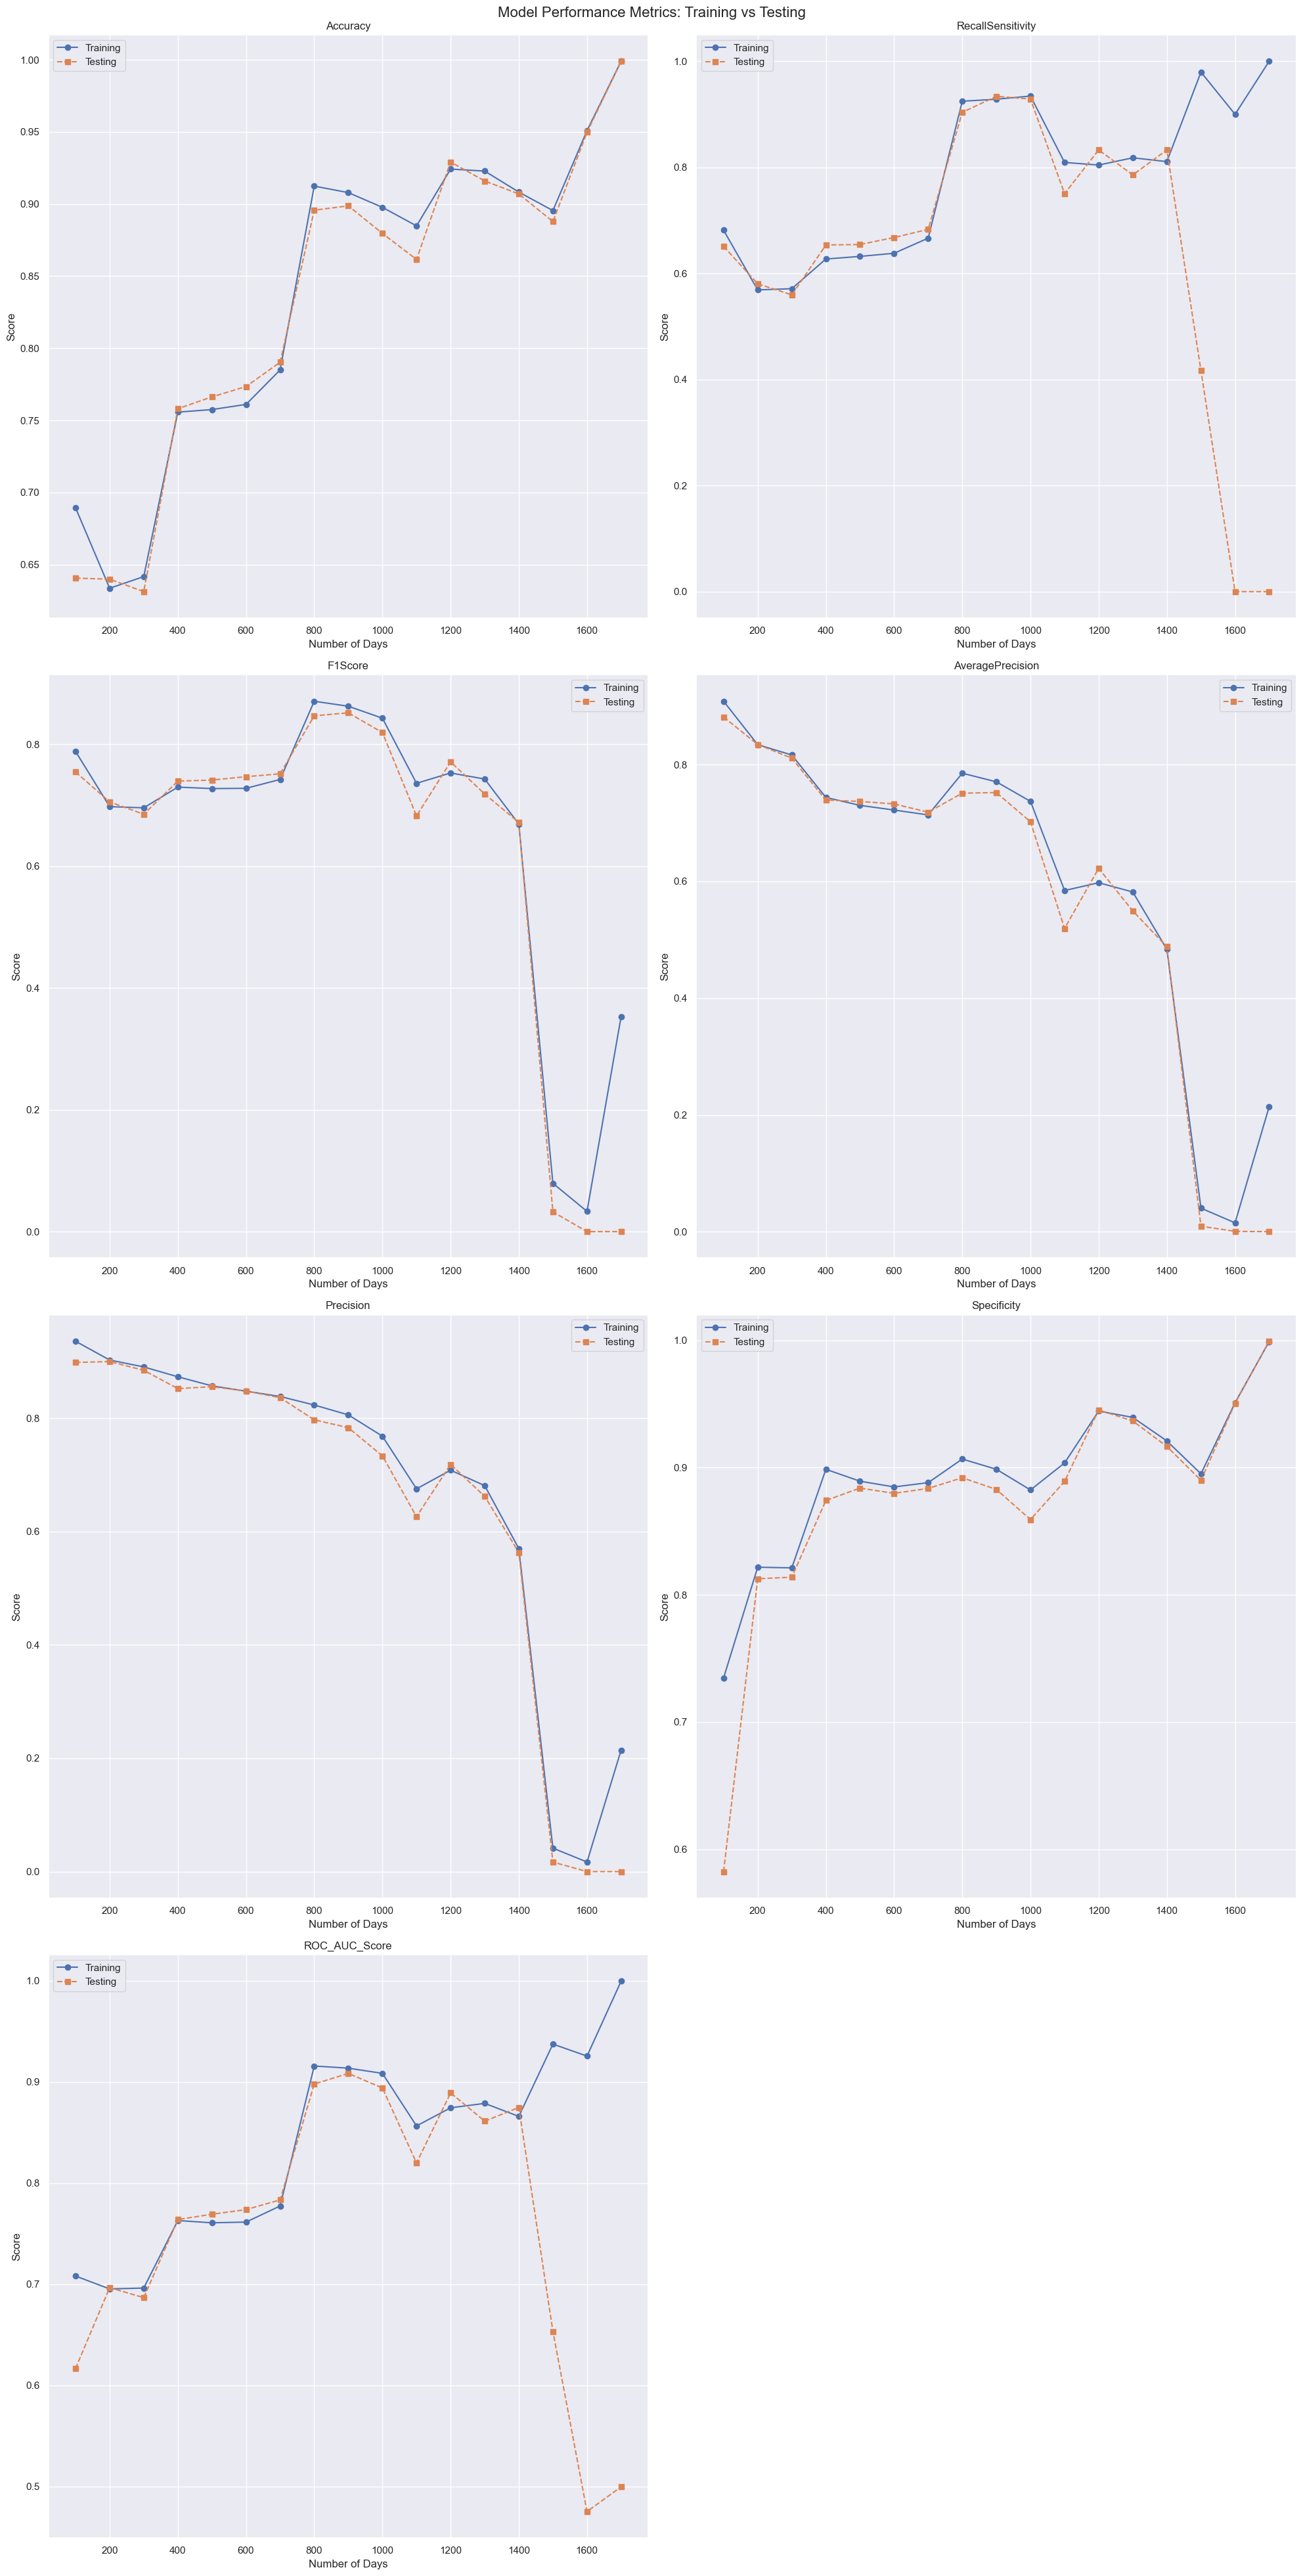

In [5]:
# Dynamically get all metrics (excluding specified columns)
metrics = [col for col in df.columns if col not in ['Algorithm','Model','Description','DataType','Info']]

# Calculate the number of rows and columns for subplots
n_metrics = len(metrics)
n_cols = min(2, n_metrics)  # Max 2 columns
n_rows = int(np.ceil(n_metrics / n_cols))  # Using np.ceil and converting to int

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(10*n_cols, 10*n_rows))
fig.suptitle('Model Performance Metrics: Training vs Testing\n\n', fontsize=16)

# Flatten axes array for easier indexing
axes = axes.flatten() if n_metrics > 1 else [axes]

for i, metric in enumerate(metrics):
    ax = axes[i]
    for data_type, linestyle, marker in [('Training', '-', 'o'), ('Testing', '--', 's')]:
        data = df[df['DataType'] == data_type]
        ax.plot(data['Info'].str.replace(' days', '').astype(int), data[metric], 
                linestyle=linestyle, marker=marker, label=f'{data_type}')
    
    ax.set_xlabel('Number of Days')
    ax.set_ylabel('Score')
    ax.set_title(metric)
    ax.legend()
    ax.grid(True)

# Remove any unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()
